In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 1. Linear regression on a parabola

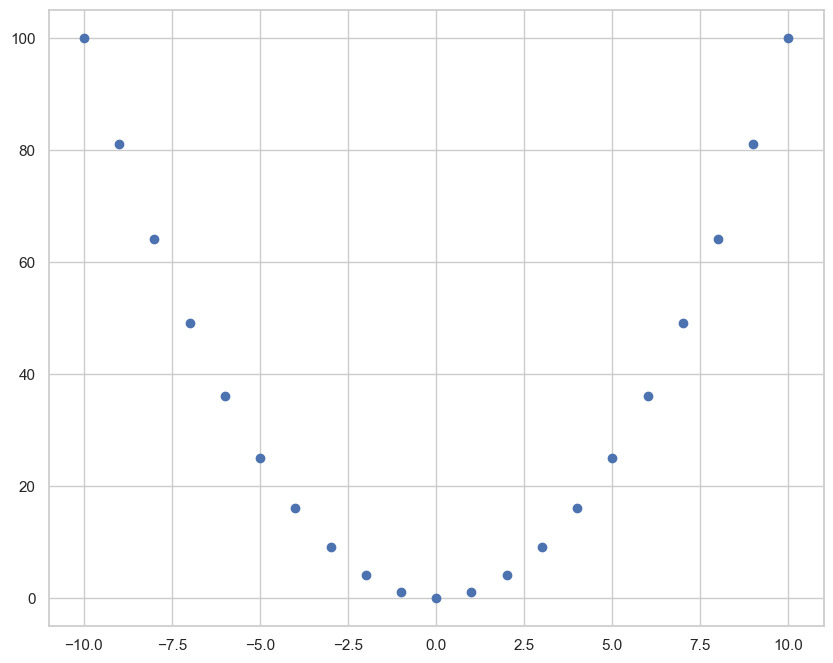

In [2]:
X = np.arange(-10,11)
Y = np.square(X)

plt.figure(figsize=(10,8),dpi=100)
sns.set_theme(style="whitegrid")
plt.scatter(X,Y)

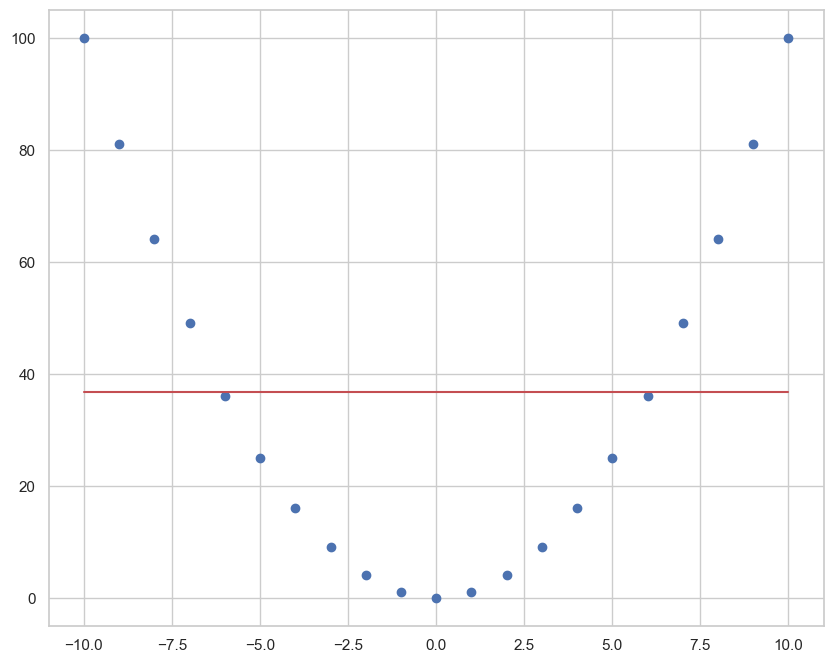

In [3]:
lr = LinearRegression()
lr.fit(X.reshape(-1,1), Y)

plt.figure(figsize=(10,8), dpi=100)
plt.scatter(X, Y)
plt. plot(X, lr.coef_*X + lr.intercept_, "-r")

As expected, the linear regression tryes to minimizes the squares of the distances. Of course it is a very bad fit.

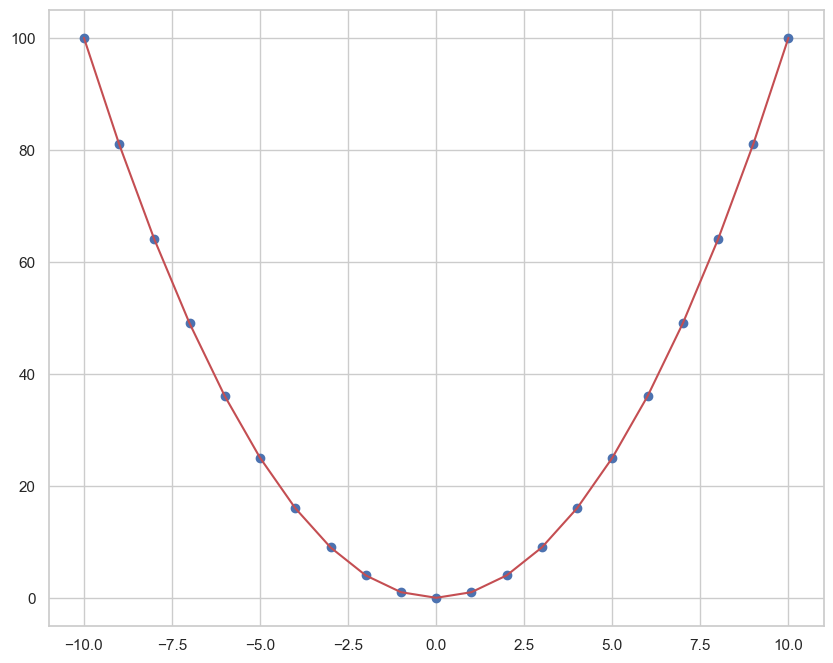

In [4]:
poly_regs = PolynomialFeatures(degree=2)
x_poly = poly_regs.fit_transform(X.reshape(-1,1))

lr = LinearRegression()
lr.fit(x_poly, Y)

plt.figure(figsize=(10,8), dpi=100)
plt.scatter(X, Y)
plt.plot(X, lr.predict(x_poly), "-r")

After having applied the transformation with polynomials, now the line "fits" the parabola

# 2. Single variable linear regression

In [5]:
!curl -k -L -o kc_house_data.csv https://github.com/Shreyas3108/house-price-prediction/raw/master/kc_house_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2456k  100 2456k    0     0   541k      0  0:00:04  0:00:04 --:--:--  725k


### Exploratory Data Analysis: EDA

In [6]:
houses = pd.read_csv("kc_house_data.csv")
houses.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Axes: >

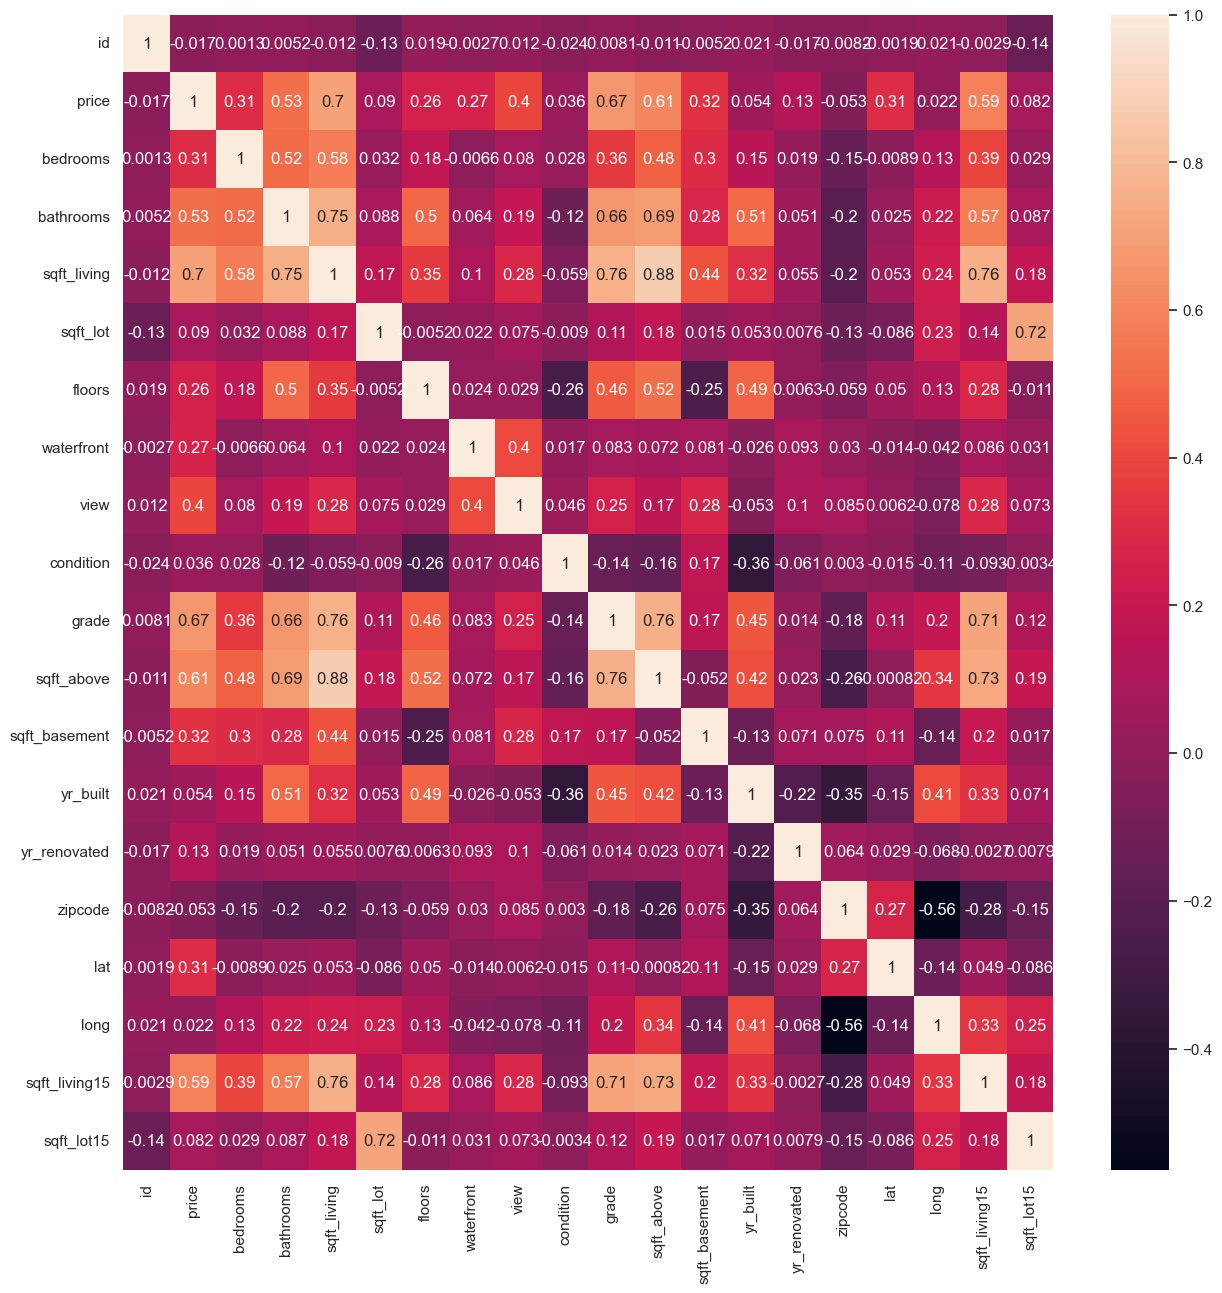

In [8]:
# Correlation between variables

houses_values = houses.drop("date", axis=1)
correlations = houses_values.corr()

plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(correlations, annot=True)

Strongly negatives and positives are correlated. Values close to zero are not.

Text(0, 0.5, 'Price (in millions)')

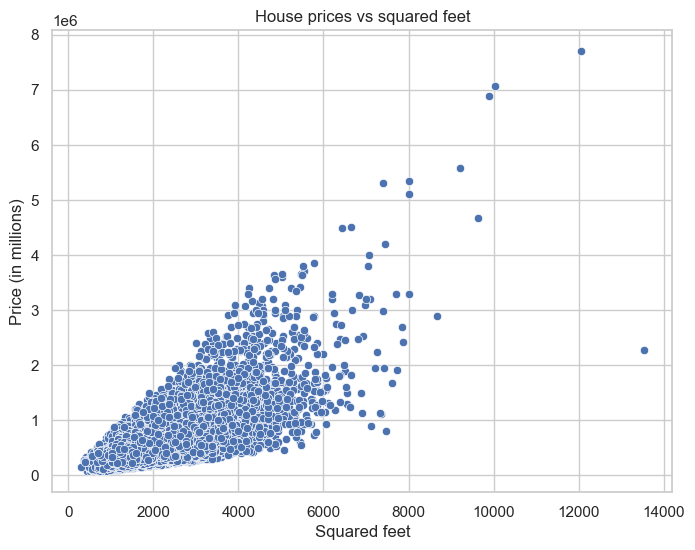

In [9]:
plt.figure(figsize=(8,6), dpi=100)
sns.set_theme(style="whitegrid")

sns.scatterplot(x="sqft_living", y="price", data=houses)

plt.title("House prices vs squared feet")
plt.xlabel("Squared feet")
plt.ylabel("Price (in millions)")

We will train a regression model on all these data (just a pair).

### Train and test

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
X = houses[["sqft_living"]]
Y = houses[["price"]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print(lr.intercept_)
print(lr.coef_)

[-37392.6205702]
[[276.97862984]]


The underscore is for the trained variables of the model, so the output of the training phase.

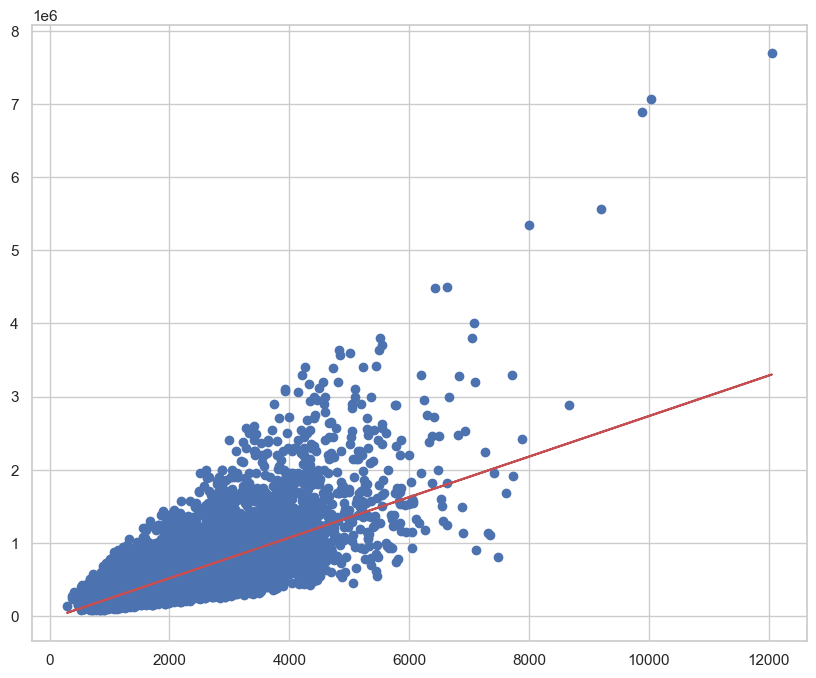

In [13]:
plt.figure(figsize=(10,8), dpi=100)
sns.set_theme(style="whitegrid")

plt.scatter(x_train, y_train)
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, "-r")

In [14]:
# example of prediction

print("The price of the house is: ", lr.predict([[1000]]))

The price of the house is:  [[239586.00926675]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root MSE: ", rmse)

Root MSE:  269059.2162251816


In [17]:
y_test

,price
16284,850000.0
20084,809950.0
7706,569000.0
20583,749000.0
19357,1400000.0
...,...
4544,603000.0
16782,150000.0
386,365500.0
4562,477000.0


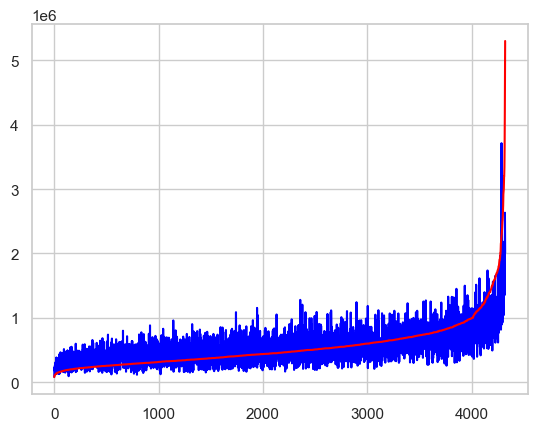

In [28]:
y_test_series = y_test["price"]
y_test_sorted = y_test_series.argsort()
plt.plot(y_pred[y_test_sorted.to_numpy()], color="blue")
plt.plot(y_test.to_numpy()[y_test_sorted.to_numpy()], color="red")

# 3. Exercise: Medical Costs Personal Datasets

In [2]:
import kagglehub

path = kagglehub.dataset_download("mirichoi0218/insurance")
print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/fousseni/.cache/kagglehub/datasets/mirichoi0218/insurance/versions/1


In [3]:
import os

data = os.path.join(path, "insurance.csv")  # sostituisci se cambia il nome
df = pd.read_csv(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [6]:
df['sex'] = df['sex'].map({'female': 1, 'male': 0})

In [7]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [8]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [9]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

<Axes: >

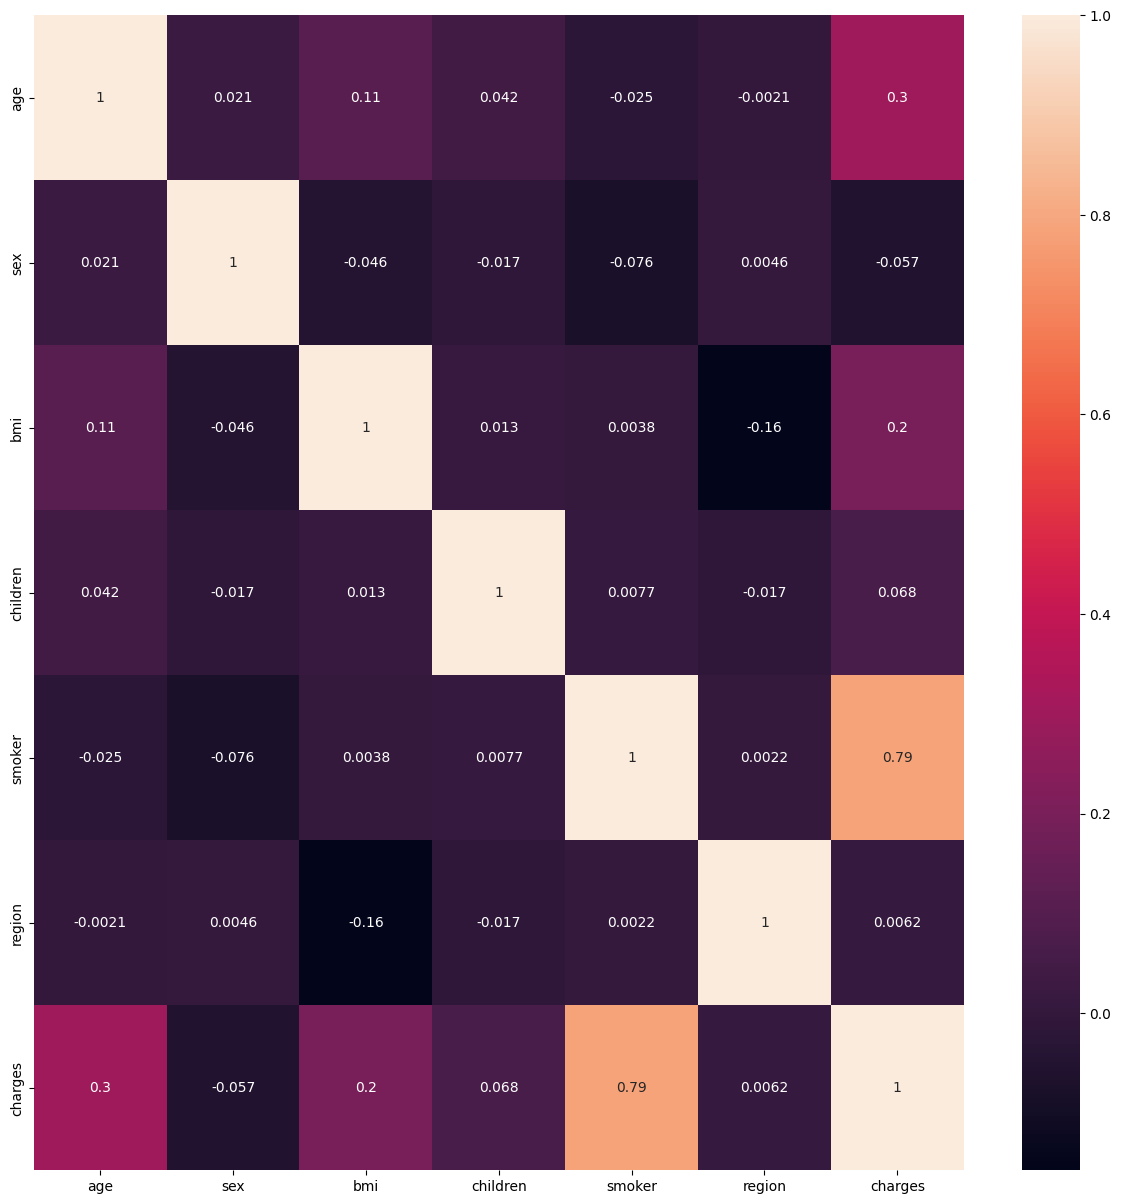

In [11]:
correlations = df.corr()

plt.figure(figsize=(15,15), dpi=100)
sns.heatmap(correlations, annot=True)

Text(0, 0.5, 'Charges')

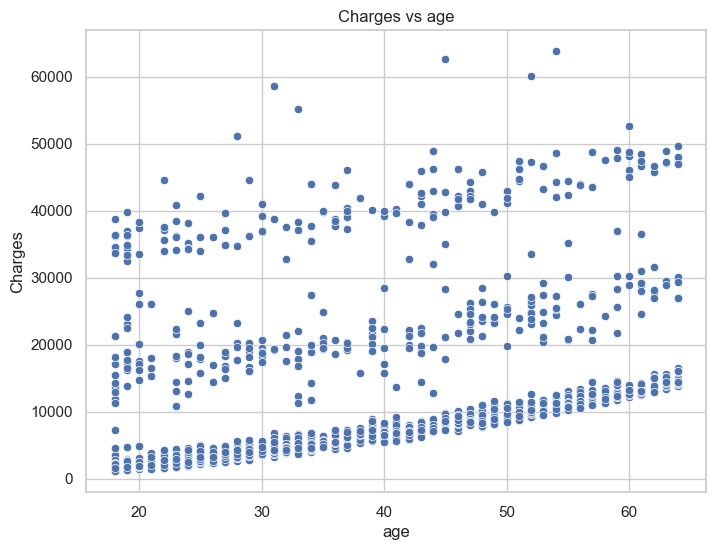

In [19]:
plt.figure(figsize=(8,6), dpi=100)
sns.set_theme(style="whitegrid")

sns.scatterplot(x="age", y="charges", data=df)

plt.title("Charges vs age")
plt.xlabel("age")
plt.ylabel("Charges")

In [20]:
Y = df[["charges"]]
X = df[["age"]]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

In [21]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print(lr.intercept_)
print(lr.coef_)

[3154.27646847]
[[256.97602127]]


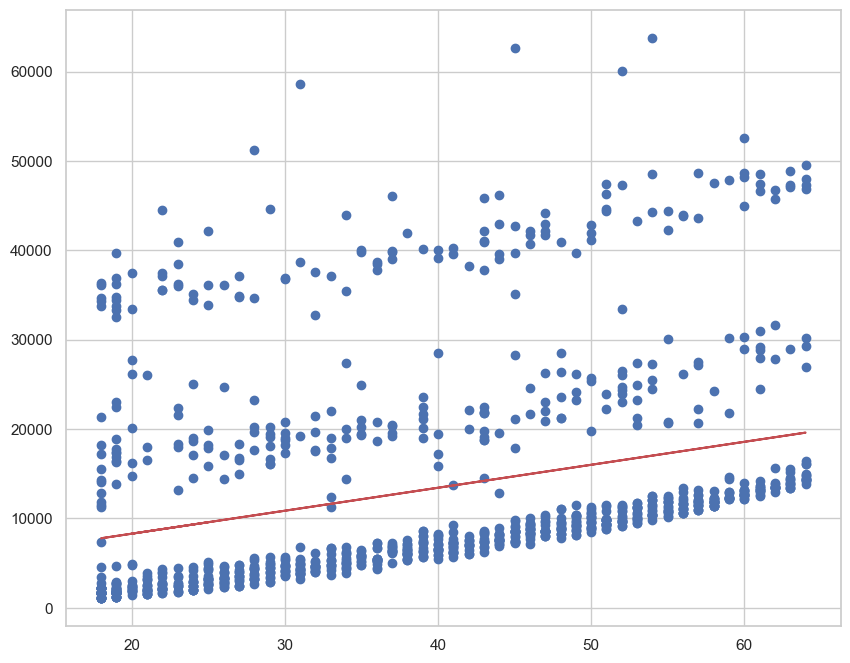

In [22]:
plt.figure(figsize=(10,8), dpi=100)
sns.set_theme(style="whitegrid")

plt.scatter(x_train, y_train)
plt.plot(x_train, lr.coef_*x_train + lr.intercept_, "-r")

In [23]:
# example of prediction

print("The charge is: ", lr.predict([[40]]))

The charge is:  [[13433.31731914]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root MSE: ", rmse)

Root MSE:  11718.14083378858


# 4. Multivariate variable linear regression

In [26]:
!curl -k -L -o kc_house_data.csv https://github.com/Shreyas3108/house-price-prediction/raw/master/kc_house_data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2456k  100 2456k    0     0   748k      0  0:00:03  0:00:03 --:--:--  992k


In [27]:
houses = pd.read_csv("kc_house_data.csv")
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [28]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Text(0.5, 1.0, 'Price distribution')

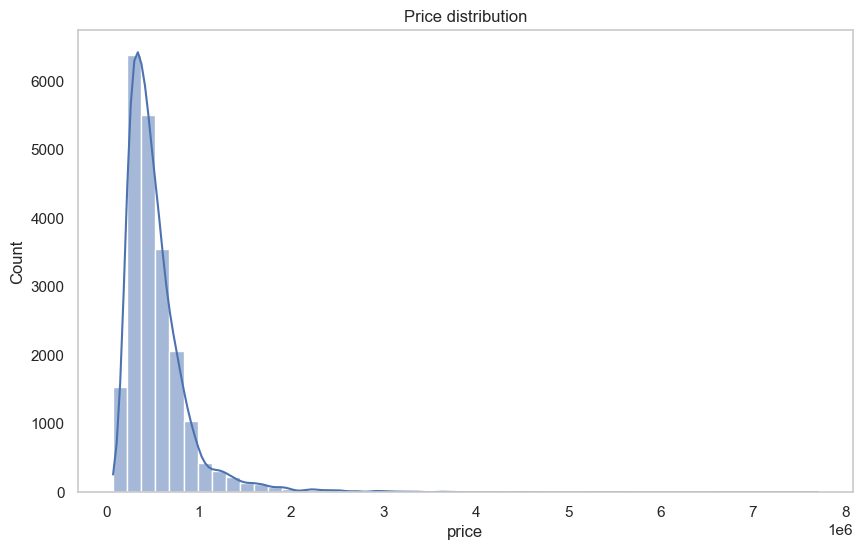

In [29]:
plt.figure(figsize=(10,6), dpi=100)
sns.histplot(houses["price"], kde=True, bins=50)
plt.grid()
plt.title("Price distribution")

Text(0, 0.5, 'Price (in millions)')

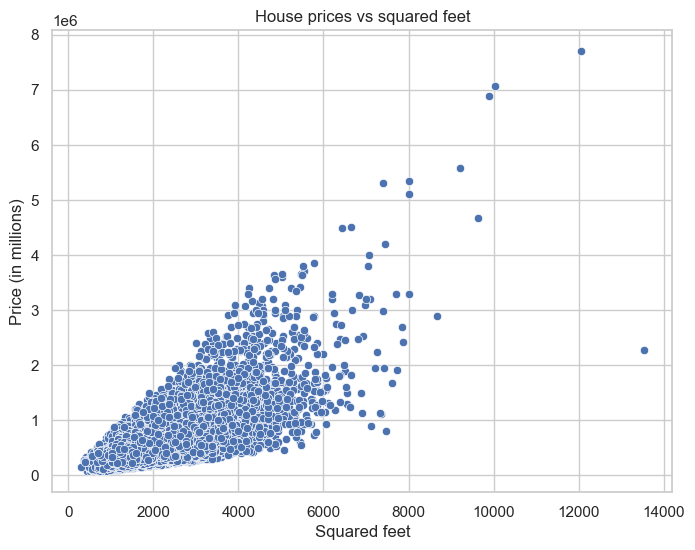

In [30]:
plt.figure(figsize=(8,6), dpi=100)
sns.set_theme(style="whitegrid")

sns.scatterplot(x="sqft_living", y="price", data=houses)

plt.title("House prices vs squared feet")
plt.xlabel("Squared feet")
plt.ylabel("Price (in millions)")

In [38]:
X = houses.drop(["id", "date", "price"], axis=1)  # Selecting all the features except the irrelevant ones and the target
Y = houses["price"]

In [41]:
# Standardization and scaling features;
# Scale of features can be very different, and the majority of the contribution can come from some features rather than others.
# So we normalize the data (for each entry, subtract the mean and divide by the standard deviation).
# The scale is changed but the information is intact!

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) 

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)

print(lr.coef_)
print(lr.intercept_)

[-3.69950323e+04  4.16850150e+04  1.14527289e+02  1.20293286e-01
  5.00100526e+03  5.43793315e+05  5.58158229e+04  2.48529997e+04
  9.58676495e+04  7.32760465e+01  4.12512426e+01 -2.60525415e+03
  1.99179517e+01 -5.82978648e+02  6.06078288e+05 -2.13546860e+05
  1.53332404e+01 -3.91813508e-01]
6711299.419916621


For the multivariate regression, we use the same function of the linear regression, but now there's a coefficient for each variable.

In [44]:
y_pred = lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE: ", rmse)

RMSE:  189330.8747737737


In [47]:
mae = mean_absolute_error(y_test, y_pred)   # mean absolute error
print("MAE: ", mae)

MAE:  124931.49482153235


The multivariate regression will reduce the error, of course! The more features, the better the performance of the model. Some other features are actually useful.